<a href="https://colab.research.google.com/github/muhamadanaz/praktikum-3-komputer-grafis/blob/main/perspektif_gbr_3D_NIM_G_211_22_0049.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

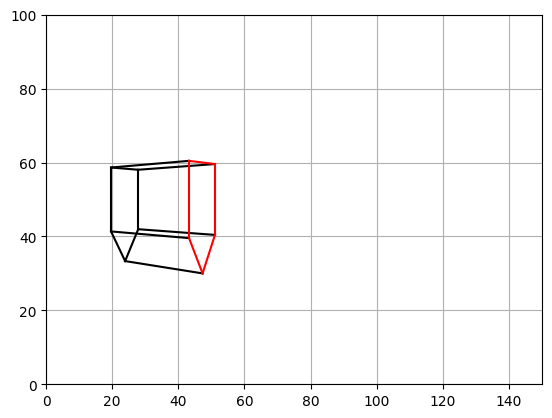

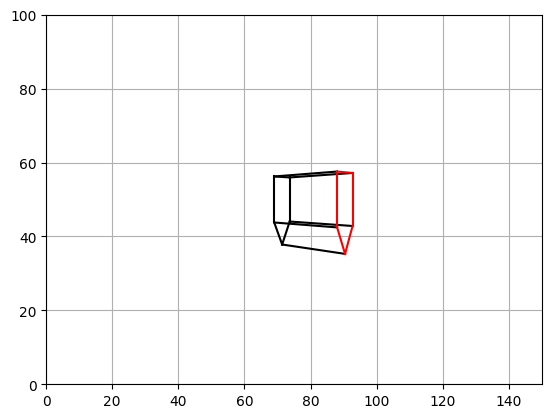

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, radians, sqrt

def setup_plot():
    plt.axis([0, 150, 0, 100])
    plt.axis("on")
    plt.grid(True)

# Object local corner coordinates
x = [-20, -20, 20, 20, -20, -20, 20, 20, -20, 20]
y = [-10, -10, -10, -10, 10, 10, 10, 10, -20, -20]
z = [5, -5, -5, 5, 5, -5, -5, 5, 0, 0]

# Initial object center coordinates
xc = 30
yc = 50
zc = 10

# Object global coordinates
xg = []
yg = []
zg = []

for i in range(len(x)):
    xg.append(x[i] + xc)
    yg.append(y[i] + yc)
    zg.append(z[i] + zc)

# Plot object
def plothouse(xg, yg, zg):
    plt.plot([xg[0], xg[3]], [yg[0], yg[3]], color='k')
    plt.plot([xg[1], xg[2]], [yg[1], yg[2]], color='k')
    plt.plot([xg[4], xg[7]], [yg[4], yg[7]], color='k')
    plt.plot([xg[5], xg[6]], [yg[5], yg[6]], color='k')
    plt.plot([xg[8], xg[9]], [yg[8], yg[9]], color='k')
    plt.plot([xg[4], xg[0]], [yg[4], yg[0]], color='k')
    plt.plot([xg[5], xg[1]], [yg[5], yg[1]], color='k')
    plt.plot([xg[6], xg[2]], [yg[6], yg[2]], color='r')
    plt.plot([xg[7], xg[3]], [yg[7], yg[3]], color='r')
    plt.plot([xg[0], xg[8]], [yg[0], yg[8]], color='k')
    plt.plot([xg[1], xg[8]], [yg[1], yg[8]], color='k')
    plt.plot([xg[2], xg[9]], [yg[2], yg[9]], color='r')
    plt.plot([xg[3], xg[9]], [yg[3], yg[9]], color='r')
    plt.plot([xg[4], xg[5]], [yg[4], yg[5]], color='k')
    plt.plot([xg[6], xg[7]], [yg[6], yg[7]], color='r')

def roty(xc, yc, zc, x, y, z, Ry):
    x_new = x * cos(Ry) + z * sin(Ry)
    y_new = y
    z_new = -x * sin(Ry) + z * cos(Ry)
    xg = x_new + xc
    yg = y_new + yc
    zg = z_new + zc
    return [xg, yg, zg]

def perspective(xg, yg, zg, xfp, yfp, zfp):
    for i in range(len(xg)):
        a = xg[i] - xfp
        b = yg[i] - yfp
        c = zg[i] - zfp
        q = sqrt(a * a + b * b + c * c)
        ux = a / q
        uy = b / q
        uz = c / q
        qh = q * abs(zfp) / (zg[i] + abs(zfp))
        xh = ux * qh + xfp
        yh = uy * qh + yfp
        zh = 0
        xg[i] = xh
        yg[i] = yh
        zg[i] = zh

# Rotation about the Y direction
Ry = radians(30)  # example rotation angle in radians
for i in range(len(x)):
    xg[i], yg[i], zg[i] = roty(xc, yc, zc, x[i], y[i], z[i], Ry)

# Perspective transformation
xfp = 80
yfp = 50
zfp = -100
perspective(xg, yg, zg, xfp, yfp, zfp)

# Plotting the transformed object
setup_plot()
plothouse(xg, yg, zg)
plt.show()

# Redefine center coordinates and apply new transformations
xc = 80
yc = 50
zc = 50
Ry = radians(45)

# Recalculate global coordinates with new center
xg = []
yg = []
zg = []
for i in range(len(x)):
    xg.append(x[i] + xc)
    yg.append(y[i] + yc)
    zg.append(z[i] + zc)

# Apply rotation about the Y direction
for i in range(len(x)):
    xg[i], yg[i], zg[i] = roty(xc, yc, zc, x[i], y[i], z[i], Ry)

# Apply perspective transformation
perspective(xg, yg, zg, xfp, yfp, zfp)

# Plotting the new transformed object
setup_plot()
plothouse(xg, yg, zg)
plt.show()
